# Import and clean data

In [15]:
from pandas import read_csv
# Load the dataset
data = read_csv("housing.csv")
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Dataset loaded successfully with shape: (20640, 10)
Missing values per column:
total_bedrooms    207
dtype: int64


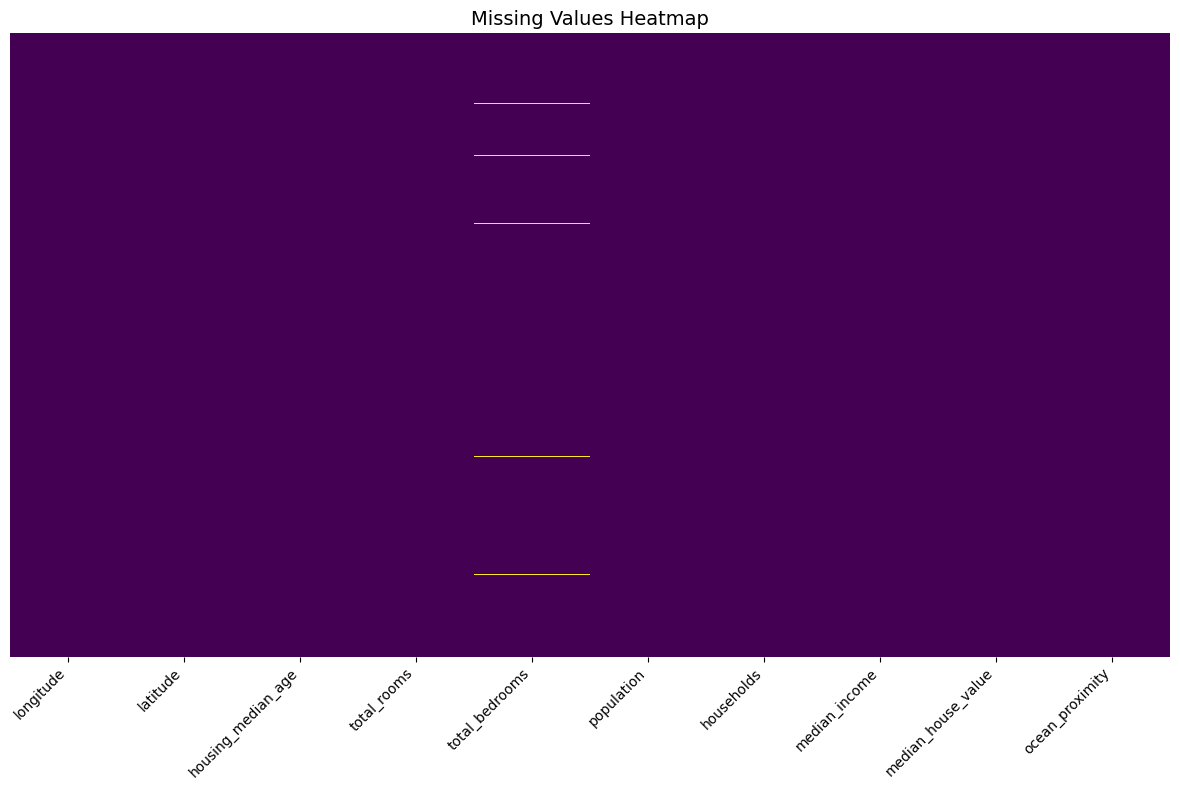

Dropped rows with missing values. Shape changed from (20640, 10) to (20433, 10).
Normalization complete for columns: ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical variables transformed into numeric (one-hot encoded) variables.
Processed dataset saved to 'processed_housing.csv'.
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88            0.982163    -0.803813       -0.970325   
1    -122.22     37.86           -0.606210     2.042130        1.348276   
2    -122.24     37.85            1.855769    -0.535189       -0.825561   
3    -122.25     37.85            1.855769    -0.623510       -0.718768   
4    -122.25     37.85            1.855769    -0.461970       -0.611974   

   population  households  median_income  median_house_value  \
0   -0.973320   -0.976833       2.345163            452600.0   
1    0.861339    1.670373       2.332632            358500.0   
2   -0.8197

In [14]:
from data import DataProcessor

# Initialize the processor with the file path
processor = DataProcessor("housing.csv")

# Load the data
processor.load_data()

# Check for missing values
processor.check_missing_values()

processor.plot_missing_values()

# Drop rows with missing values
processor.drop_missing_values()

# Normalize numeric columns
numeric_columns = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
processor.normalize_columns(numeric_columns)

# Transform categorical variables
processor.transform_categorical_to_numeric()

# Save the processed dataset
processor.save_processed_data("processed_housing.csv")

# Get the processed data for further analysis
processed_data = processor.get_data()
print(processed_data.head())


# Exploratory Data Analysis


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

First five rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0

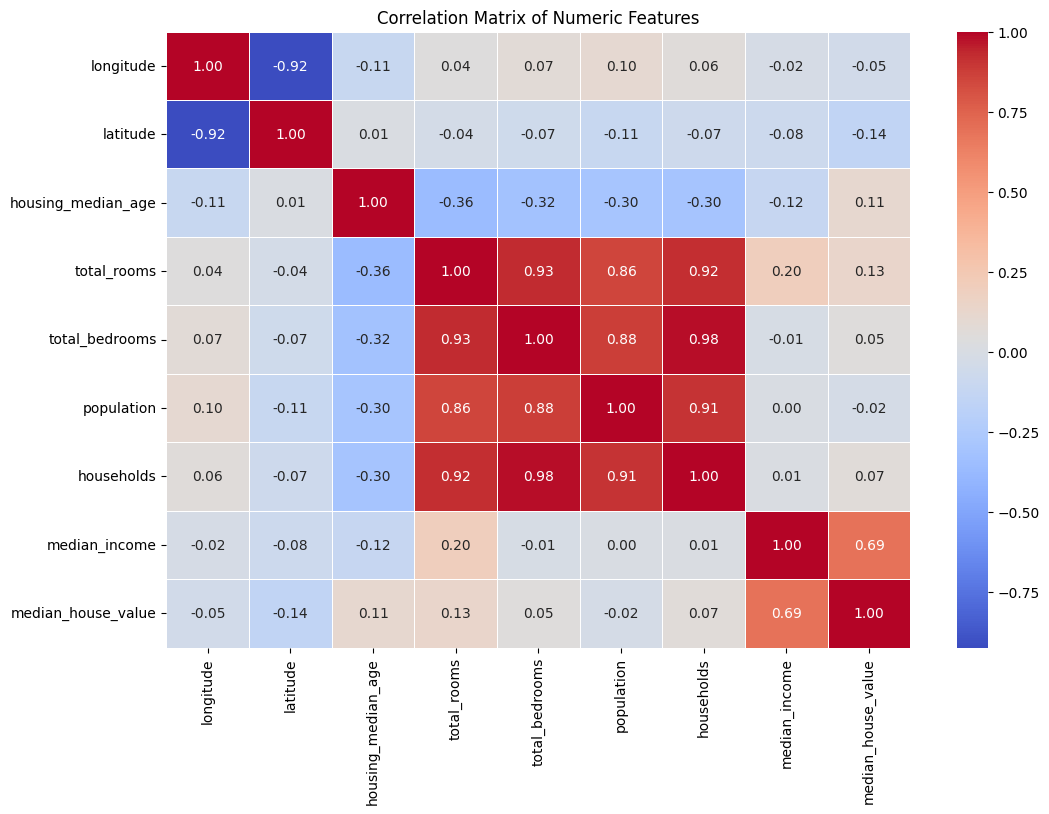

In [17]:
from data import EDA
import pandas as pd
# Perform EDA
data = pd.read_csv("housing.csv")
eda = EDA(data)
eda.display_basic_info()
eda.plot_lat_long(city_name="Houses in California")
eda.plot_correlation_matrix()

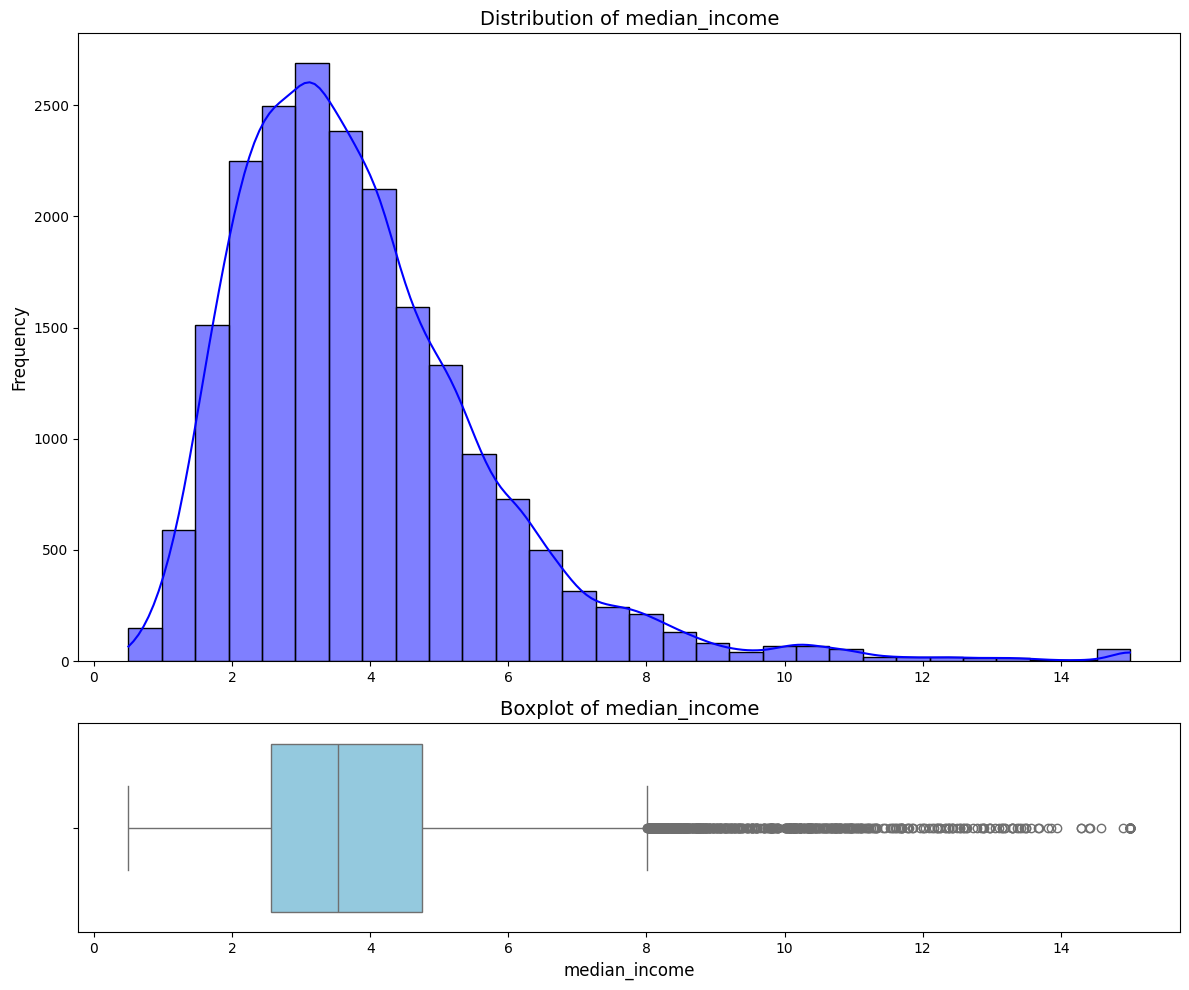

In [22]:
eda.compare_distribution_and_boxplot("median_income")

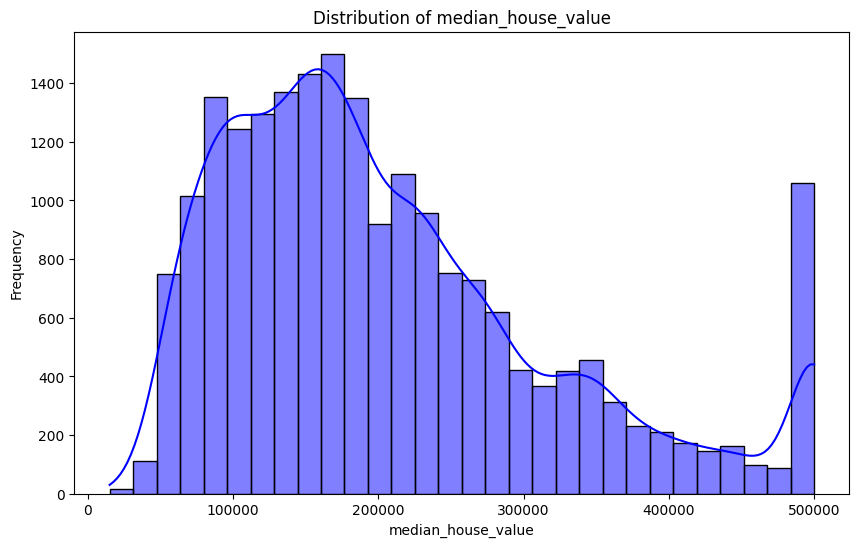

In [4]:
# Plot the distribution of a column
eda.plot_distribution("median_house_value")


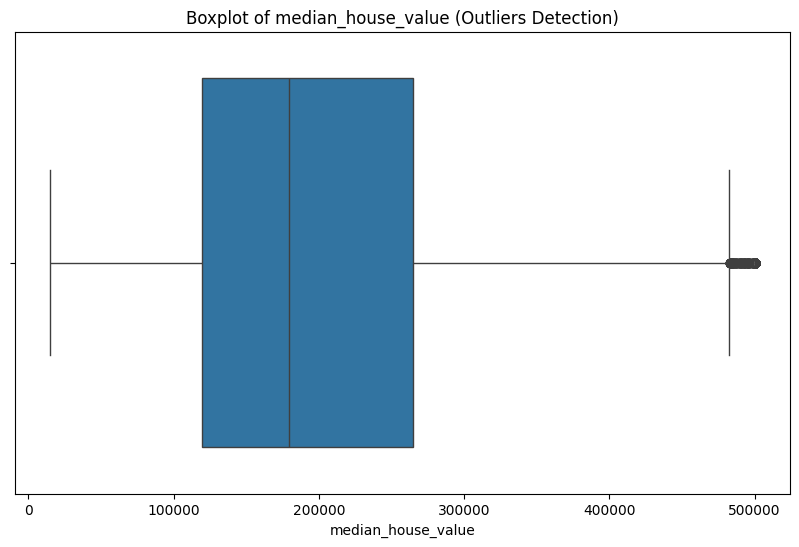

In [5]:
# Check for outliers in a specific column
eda.check_outliers("median_house_value")

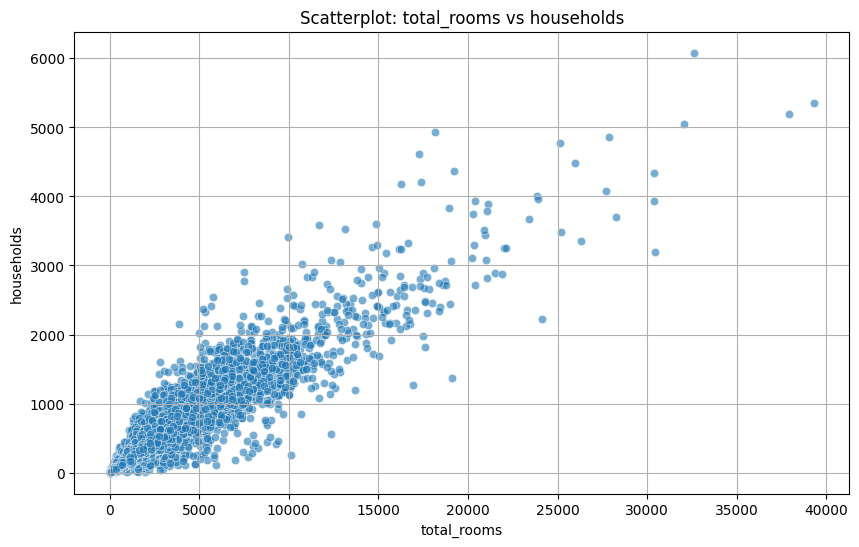

In [6]:
# Plot a scatterplot to visualize relationships
eda.plot_relationship("total_rooms", "households")

# Unsupervised Learning


## PCA

Non-numeric columns have been converted where possible.
Using Kaiser Rule: Retaining 3 components with eigenvalues > 1
Explained Variance Ratio (Selected Components): [0.43476625 0.21359172 0.18857021]
PCA Loadings:
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
PC1   0.076179 -0.075884           -0.216390     0.484432        0.489538   
PC2  -0.662017  0.690517            0.000910     0.060720        0.072145   
PC3  -0.247986  0.127760            0.049585     0.085001       -0.041180   

     population  households  median_income  median_house_value  
PC1    0.470143    0.491011       0.055842            0.045244  
PC2    0.046143    0.071802      -0.178306           -0.192222  
PC3   -0.077978   -0.026456       0.671092            0.673540  


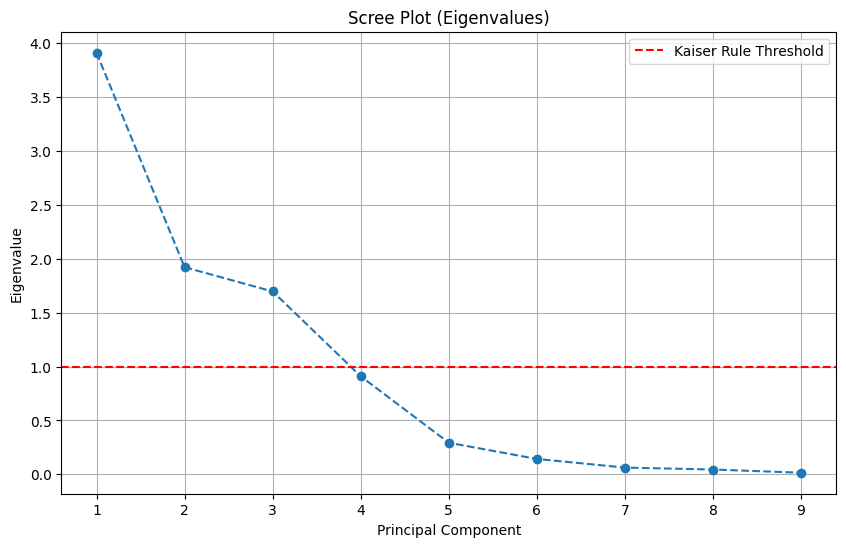

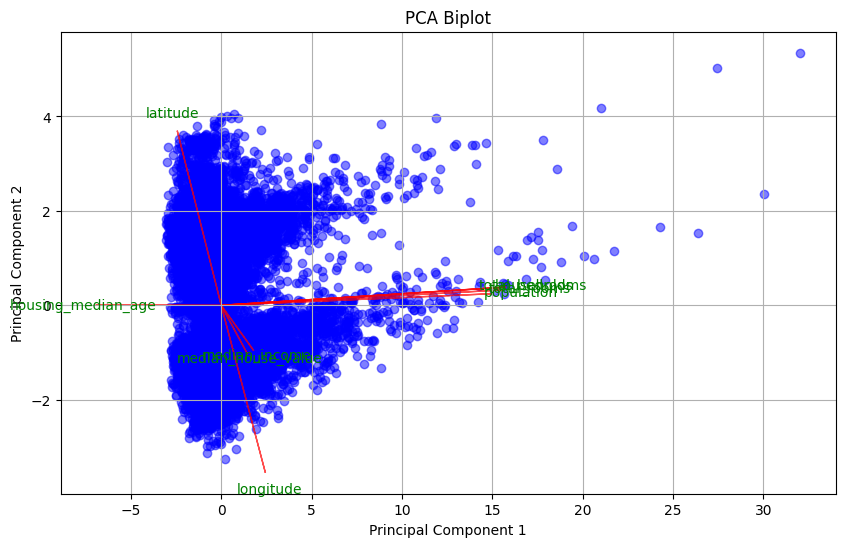

In [1]:
from unsupervized_analysis import UnsupervisedAnalysis
import pandas as pd

# Load dataset
data = pd.read_csv("processed_housing.csv")

# Initialize the analysis
analysis = UnsupervisedAnalysis(data)

# Perform PCA using the Kaiser Rule
pca_df, loadings = analysis.perform_pca()

# Inspect PCA loadings
print("PCA Loadings:")
print(loadings)

analysis.plot_screeplot()

analysis.plot_biplot()


# Clustering using KMeans

Explained Variance Ratio (Selected Components): [0.43476625 0.21359172 0.18857021]
Cluster Centers:
[[-0.66454162  1.42409525  0.31170156]
 [ 4.85506749  0.28020153 -0.02890479]
 [-0.2522739  -1.12751848 -0.23269973]]
Silhouette Score: 0.361


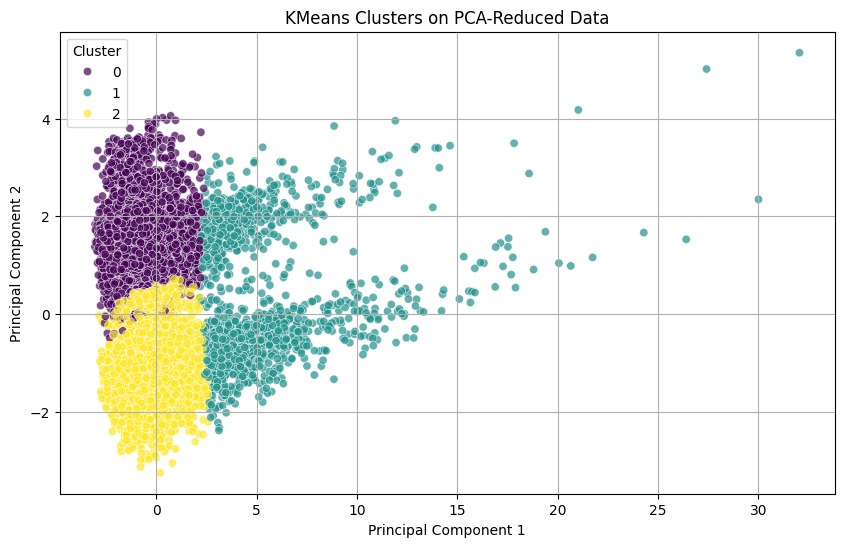

Starting plot_lat_long...
Preparing map...
Displaying map...


In [3]:
analysis.perform_pca(n_components=3)

#optimal_clusters = analysis.optimize_kmeans_with_pca(max_clusters=10)
analysis.perform_kmeans_with_pca(n_clusters=3)

analysis.plot_pca_clusters()

analysis.plot_lat_long()

Cluster Summary Statistics:


longitude   latitude  housing_median_age  total_rooms  \
Cluster                                                           
0       -121.700276  37.951000            0.092848    -0.207033   
1       -119.164901  35.251538           -0.953447     2.369743   
2       -118.013310  33.928812            0.078879    -0.214119   

         total_bedrooms  population  households  median_income  \
Cluster                                                          
0             -0.242988   -0.280996   -0.248506      -0.062553   
1              2.436534    2.249995    2.430235       0.195195   
2             -0.197227   -0.139036   -0.192039       0.016997   

         median_house_value  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
Cluster                                                                       
0             194229.760390                0.460106                0.000000   
1             223578.022741                0.350090                0.000000   
2             213860.185018                0.204637                0.000469   

         ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
Cluster                                                        
0                        0.263288                    0.098039  
1                        0.080790                    0.102932  
2                        0.000000                    0.155919

C:\Users\cibei\OneDrive\Desktop\Ai__in_decision_making\Artificial_intelligence_repo\unsupervized_analysis.py:282: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




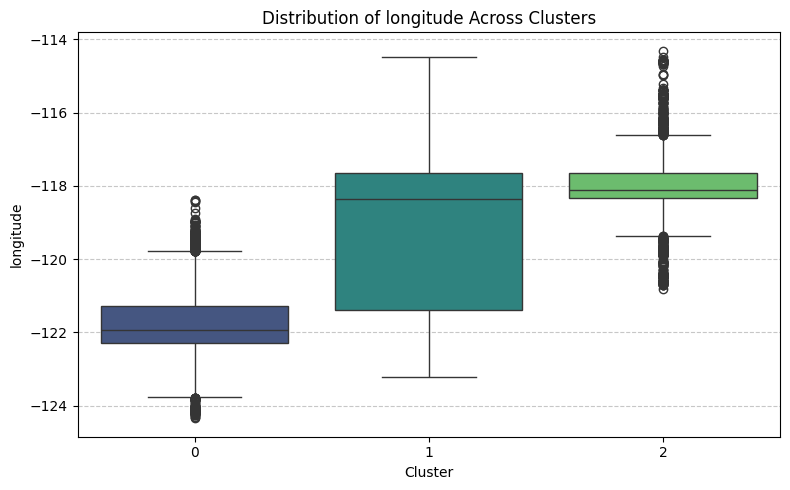

C:\Users\cibei\OneDrive\Desktop\Ai__in_decision_making\Artificial_intelligence_repo\unsupervized_analysis.py:282: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




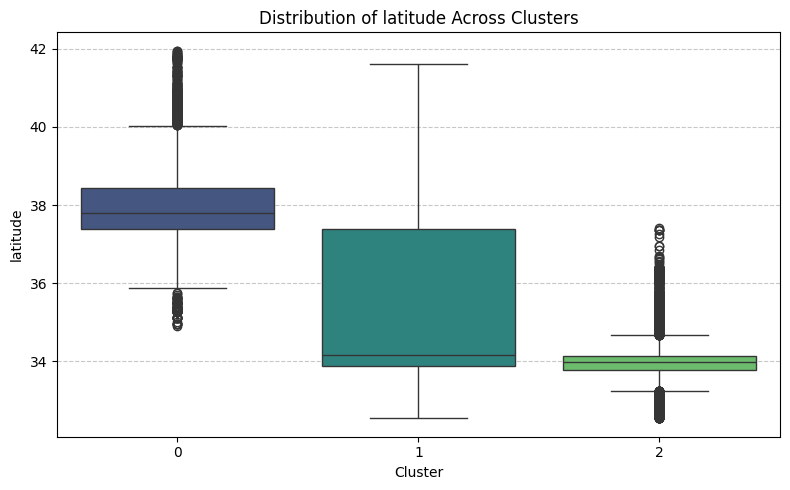

C:\Users\cibei\OneDrive\Desktop\Ai__in_decision_making\Artificial_intelligence_repo\unsupervized_analysis.py:282: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




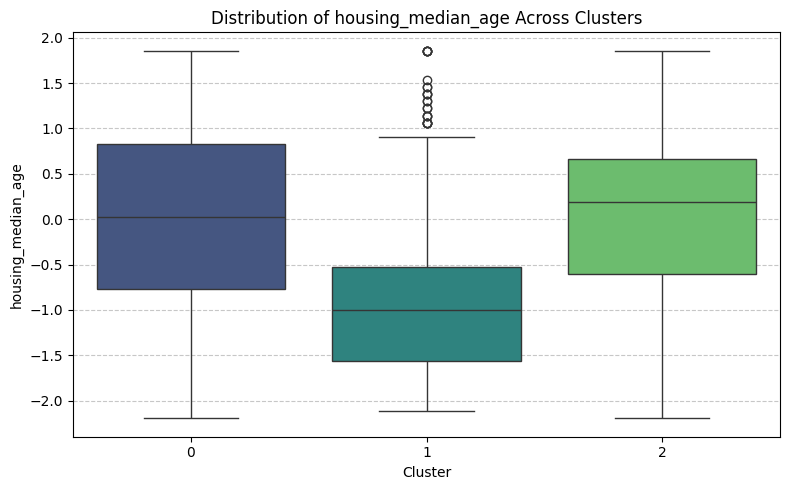

C:\Users\cibei\OneDrive\Desktop\Ai__in_decision_making\Artificial_intelligence_repo\unsupervized_analysis.py:282: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




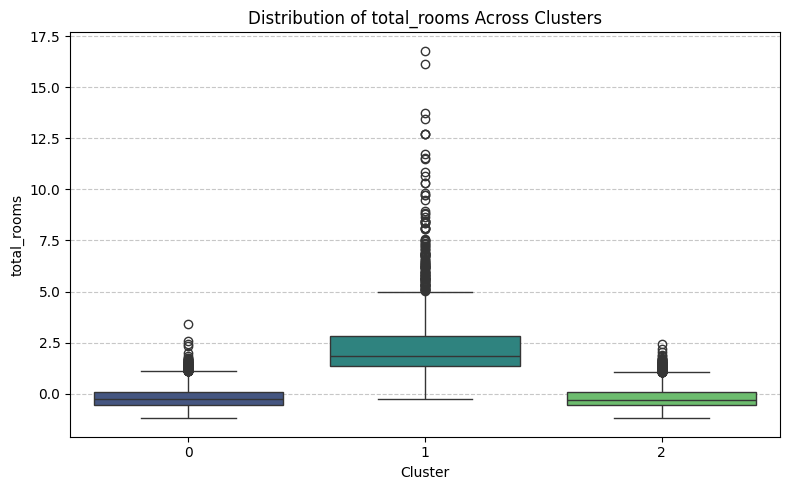

C:\Users\cibei\OneDrive\Desktop\Ai__in_decision_making\Artificial_intelligence_repo\unsupervized_analysis.py:282: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




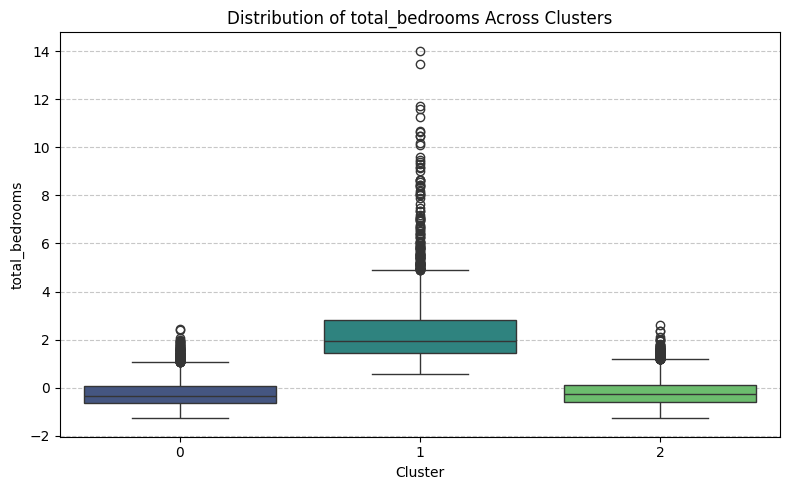

C:\Users\cibei\OneDrive\Desktop\Ai__in_decision_making\Artificial_intelligence_repo\unsupervized_analysis.py:282: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




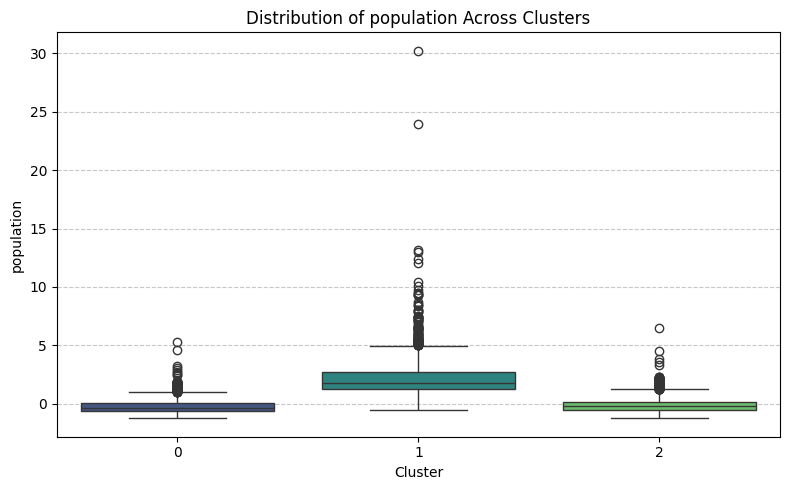

C:\Users\cibei\OneDrive\Desktop\Ai__in_decision_making\Artificial_intelligence_repo\unsupervized_analysis.py:282: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




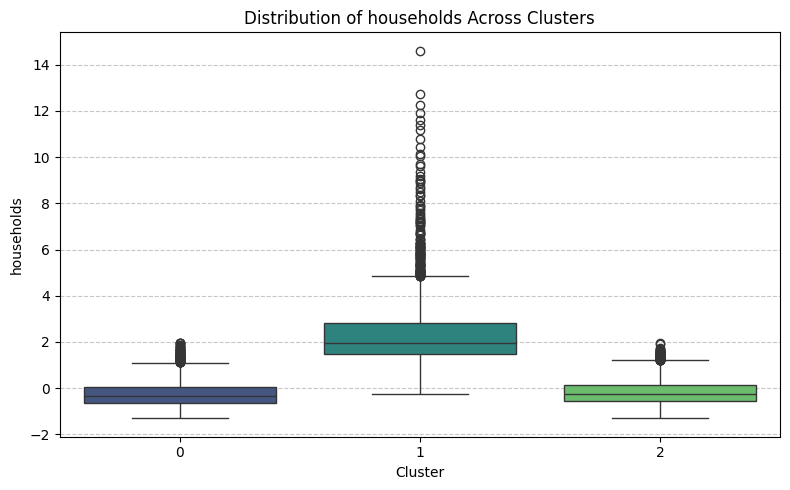

C:\Users\cibei\OneDrive\Desktop\Ai__in_decision_making\Artificial_intelligence_repo\unsupervized_analysis.py:282: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




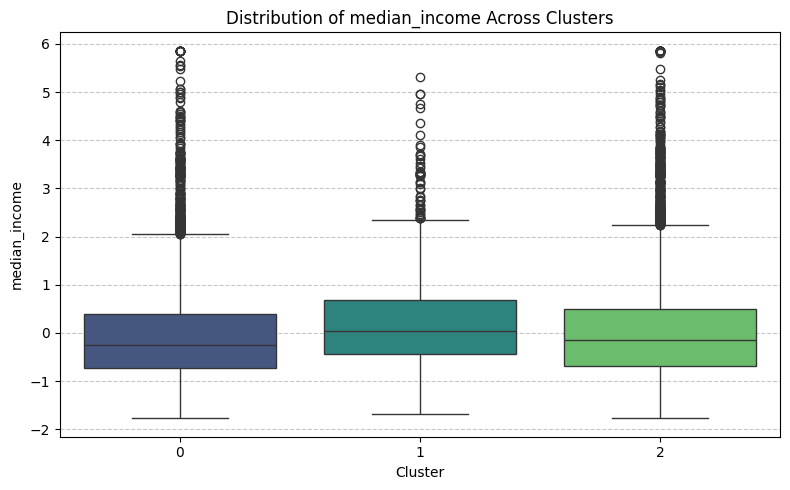

C:\Users\cibei\OneDrive\Desktop\Ai__in_decision_making\Artificial_intelligence_repo\unsupervized_analysis.py:282: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




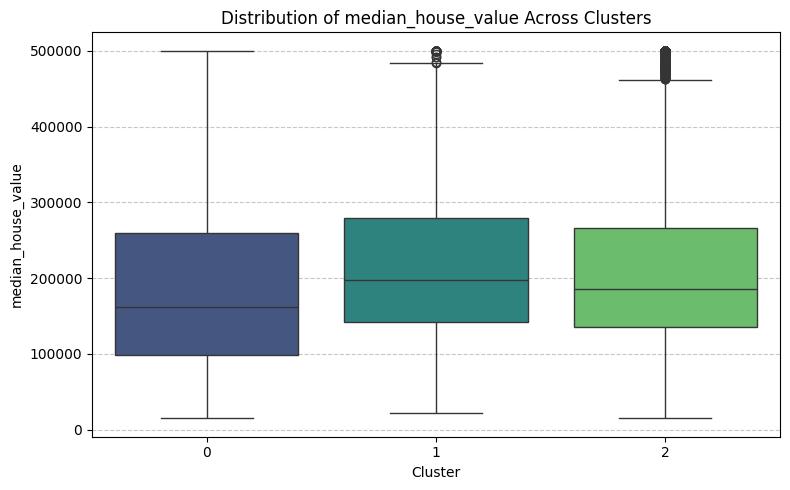

C:\Users\cibei\OneDrive\Desktop\Ai__in_decision_making\Artificial_intelligence_repo\unsupervized_analysis.py:282: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




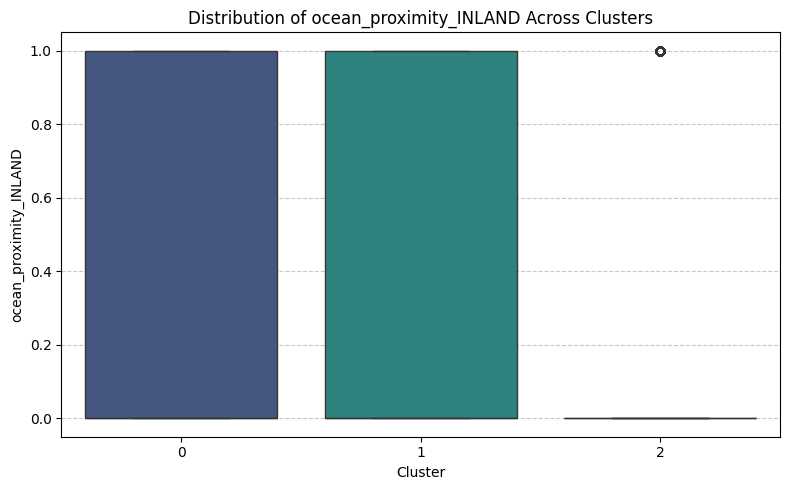

C:\Users\cibei\OneDrive\Desktop\Ai__in_decision_making\Artificial_intelligence_repo\unsupervized_analysis.py:282: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




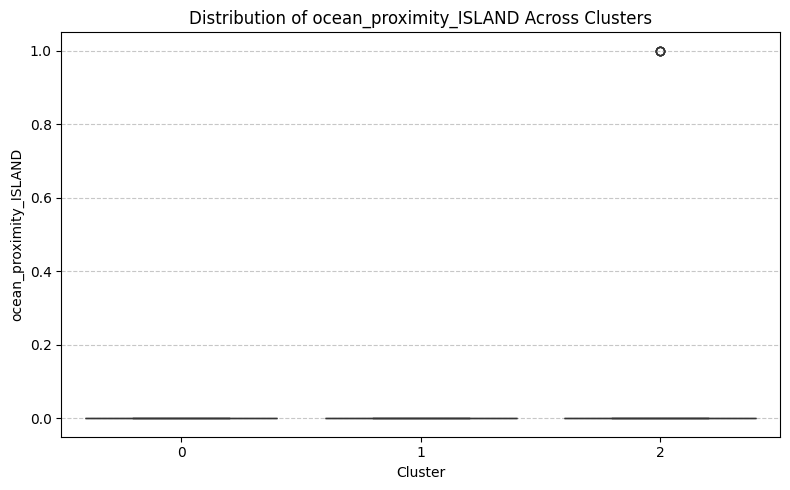

C:\Users\cibei\OneDrive\Desktop\Ai__in_decision_making\Artificial_intelligence_repo\unsupervized_analysis.py:282: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




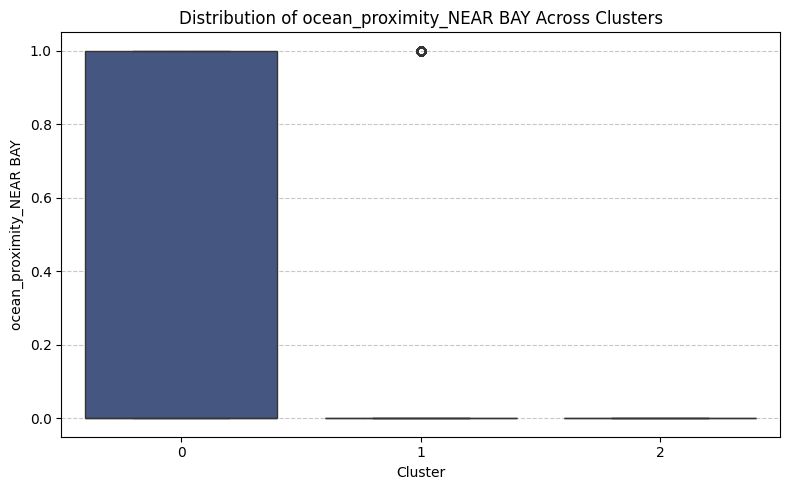

C:\Users\cibei\OneDrive\Desktop\Ai__in_decision_making\Artificial_intelligence_repo\unsupervized_analysis.py:282: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




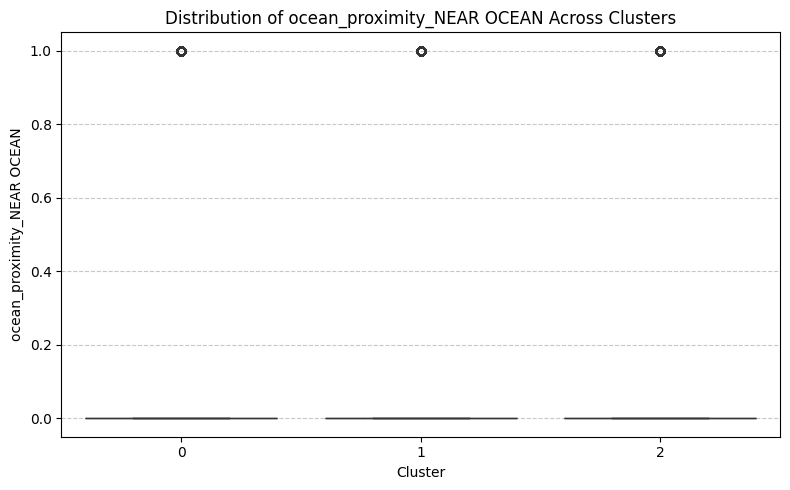

In [3]:
analysis.compare_clusters()

# Supervized analysis

Running all models with hyperparameter tuning...

Training Linear Regression...
Model: Linear Regression
Mean Absolute Error (MAE): 50413.4333
Mean Squared Error (MSE): 4802173538.6042
Root Mean Squared Error (RMSE): 69297.7167
R-squared (R²): 0.6488
Adjusted R-squared: 0.6478
--------------------------------------------------


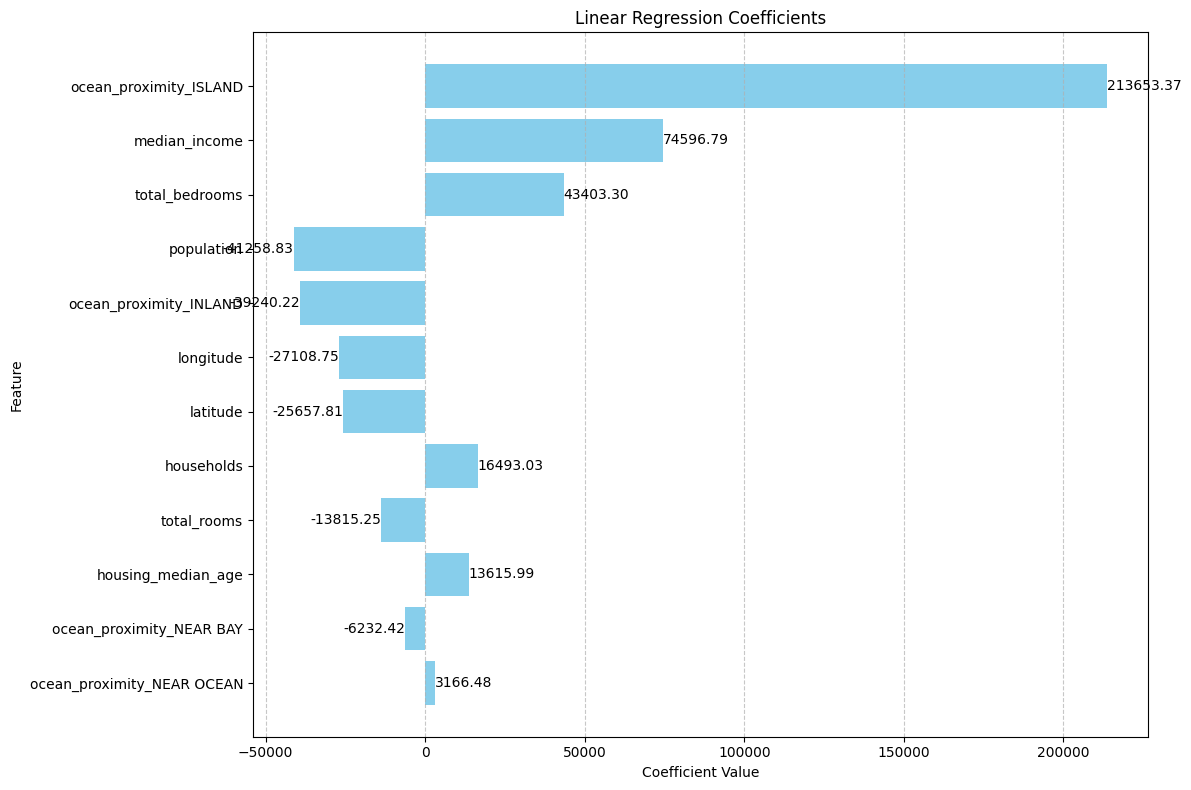


Training Random Forest...
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 500}
Model: Random Forest
Mean Absolute Error (MAE): 31641.5705
Mean Squared Error (MSE): 2375466293.6841
Root Mean Squared Error (RMSE): 48738.7556
R-squared (R²): 0.8263
Adjusted R-squared: 0.8258
--------------------------------------------------


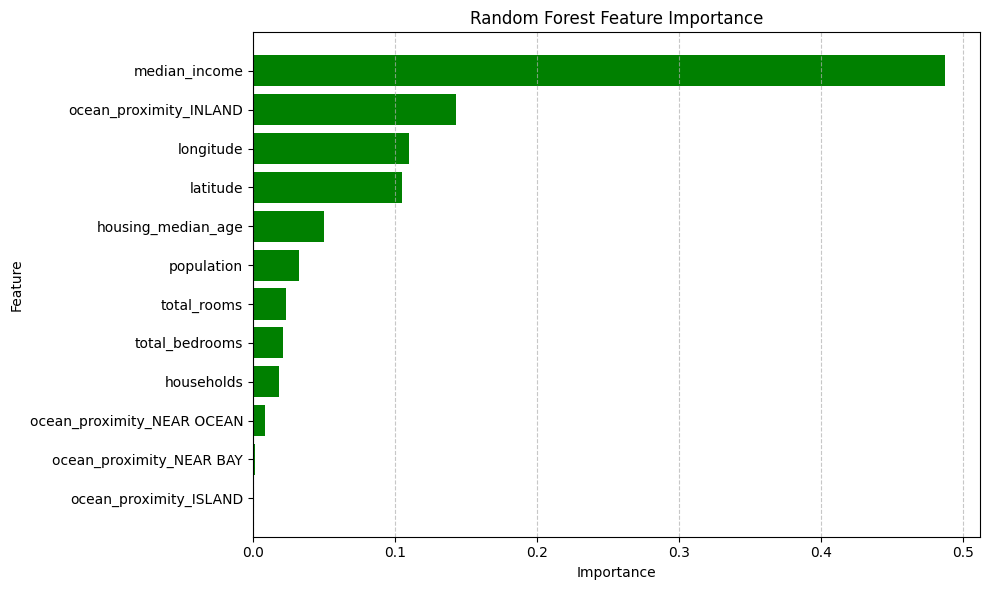


Training Neural Network...
Testing parameters: hidden_layer_sizes=(50,), activation=relu, learning_rate=0.001
Testing parameters: hidden_layer_sizes=(50,), activation=relu, learning_rate=0.01
Testing parameters: hidden_layer_sizes=(50,), activation=relu, learning_rate=0.1
Testing parameters: hidden_layer_sizes=(50,), activation=tanh, learning_rate=0.001
Testing parameters: hidden_layer_sizes=(50,), activation=tanh, learning_rate=0.01
Testing parameters: hidden_layer_sizes=(50,), activation=tanh, learning_rate=0.1
Testing parameters: hidden_layer_sizes=(100,), activation=relu, learning_rate=0.001
Testing parameters: hidden_layer_sizes=(100,), activation=relu, learning_rate=0.01
Testing parameters: hidden_layer_sizes=(100,), activation=relu, learning_rate=0.1
Testing parameters: hidden_layer_sizes=(100,), activation=tanh, learning_rate=0.001
Testing parameters: hidden_layer_sizes=(100,), activation=tanh, learning_rate=0.01
Testing parameters: hidden_layer_sizes=(100,), activation=tanh, 

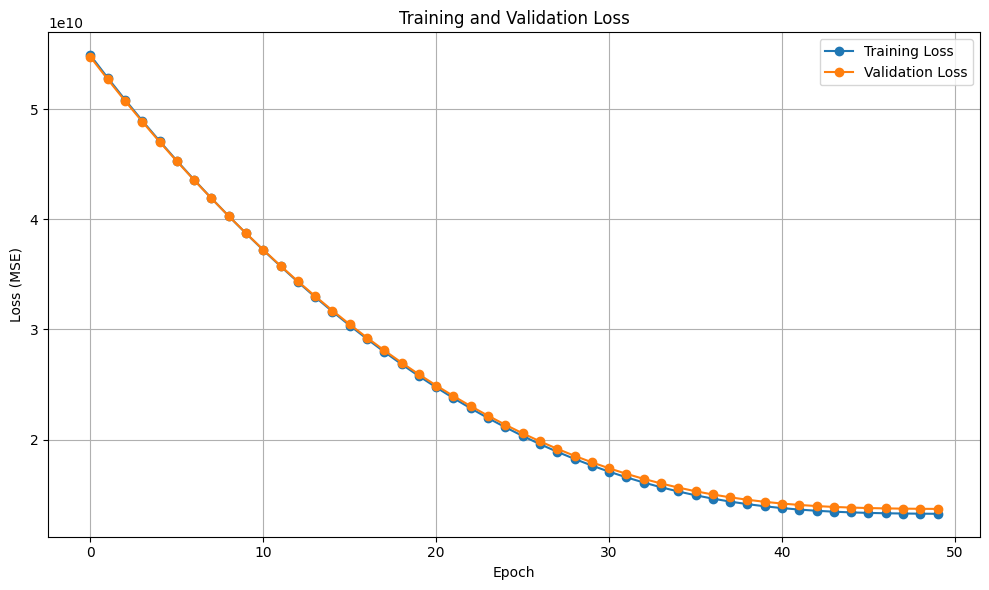

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step

Training XGBoost...
Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
Model: XGBoost
Mean Absolute Error (MAE): 30660.6096
Mean Squared Error (MSE): 2204422834.3782
Root Mean Squared Error (RMSE): 46951.2815
R-squared (R²): 0.8388
Adjusted R-squared: 0.8383
--------------------------------------------------


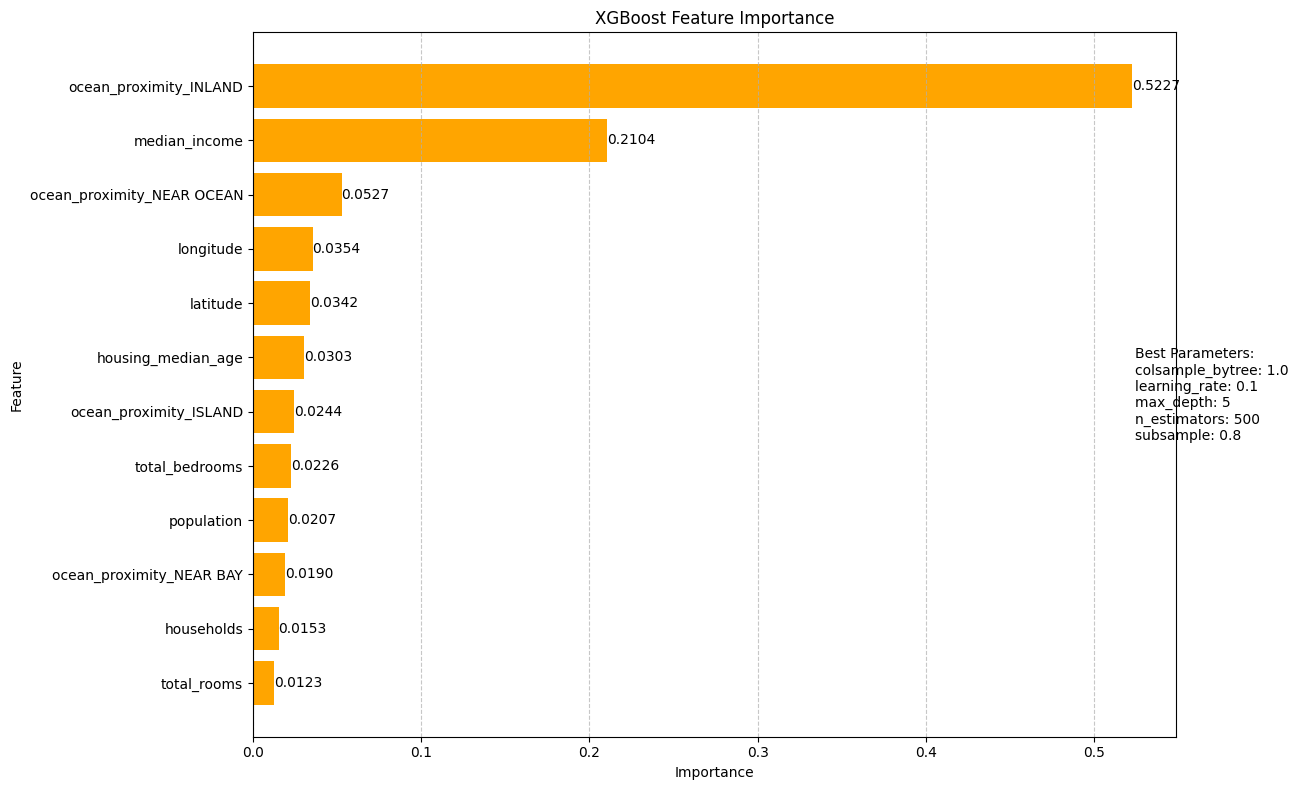

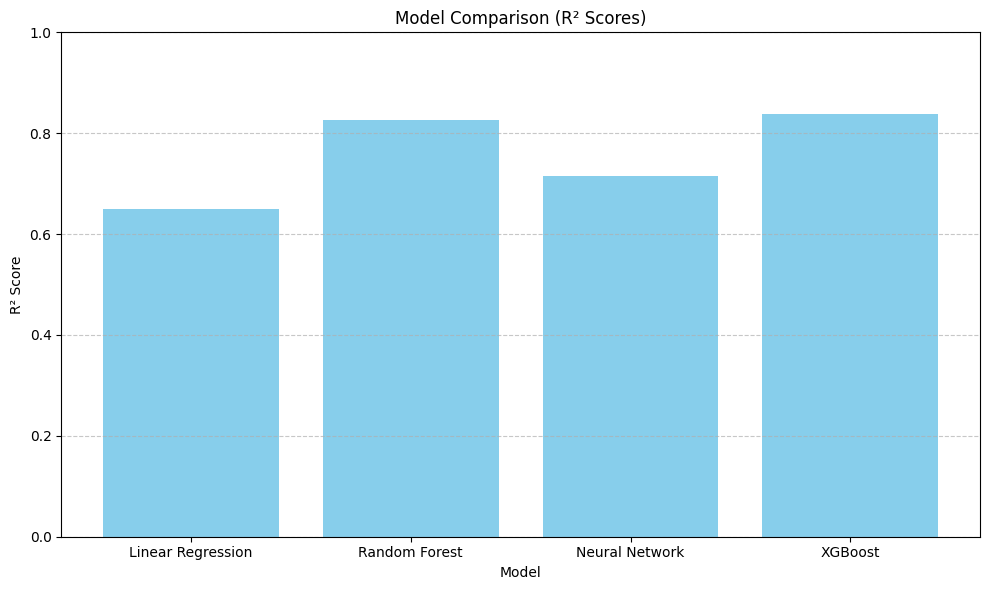


Model Evaluation Summary:
               Model           MAE           MSE          RMSE        R²  \
0  Linear Regression  50413.433308  4.802174e+09  69297.716691  0.648840   
1      Random Forest  31641.570482  2.375466e+09  48738.755562  0.826294   
2     Neural Network  43290.978569  3.882304e+09  62308.139987  0.716106   
3            XGBoost  30660.609574  2.204423e+09  46951.281499  0.838801   

   Adjusted R²  
0     0.647806  
1     0.825782  
2     0.715270  
3     0.838326  
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
Results saved to model_evaluation_summary.csv


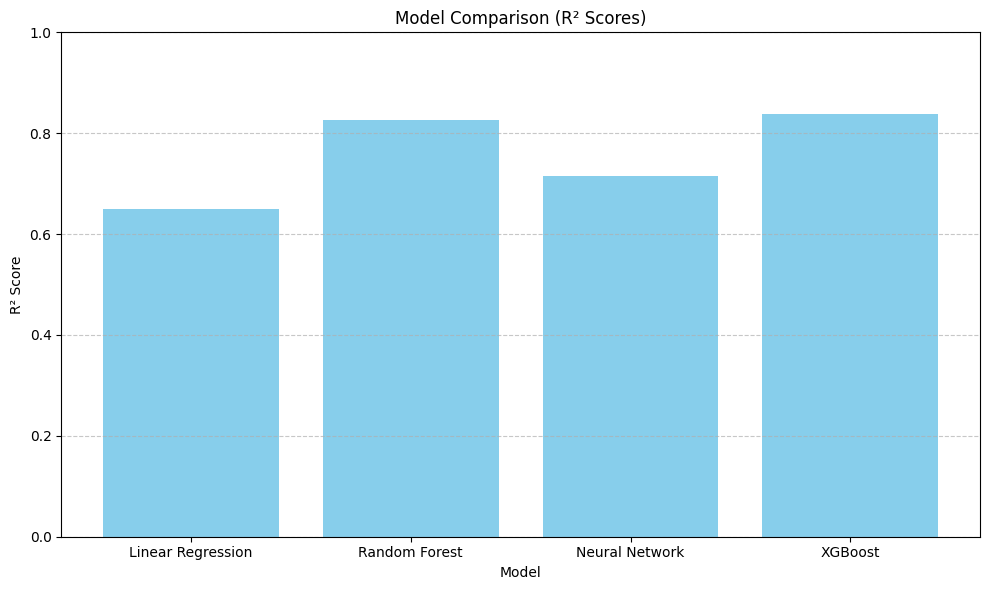

In [1]:
from supervised_analysis import SupervisedAnalysis
import pandas as pd

# Load dataset
data = pd.read_csv("processed_housing.csv")

# Initialize the analysis (replace 'median_house_value' with your target column)
analysis = SupervisedAnalysis(data, target_column='median_house_value')

# Run all models with hyperparameter tuning
print("Running all models with hyperparameter tuning...\n")
analysis.run_all_models(hyperparameter_tuning=True)

# Export evaluation metrics to CSV
results_df = pd.DataFrame([
    analysis.evaluate_model_for_summary("Linear Regression"),
    analysis.evaluate_model_for_summary("Random Forest"),
    analysis.evaluate_model_for_summary("Neural Network"),
    analysis.evaluate_model_for_summary("XGBoost")
])
results_df.to_csv("model_evaluation_summary.csv", index=False)
print("Results saved to model_evaluation_summary.csv")

# Compare R² scores for all models
analysis.plot_model_comparisons(results_df)

